In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
df = pd.read_csv('har_dataset.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (24, 11)

First 5 rows:
             activity  feature1  feature2  feature3  feature4  feature5  \
0             WALKING     0.289   -0.0203    -0.133     0.995    -0.983   
1             WALKING     0.278   -0.0164    -0.124     0.998    -0.975   
2    WALKING_UPSTAIRS     0.279   -0.0195    -0.113     0.995    -0.967   
3    WALKING_UPSTAIRS     0.279   -0.0262    -0.123     0.996    -0.983   
4  WALKING_DOWNSTAIRS     0.277   -0.0194    -0.116     0.998    -0.971   

   feature6  feature7  feature8  feature9  feature10  
0     0.914     0.152     0.081     0.006     -0.104  
1     0.960     0.133     0.108    -0.006     -0.105  
2     0.979     0.114     0.106     0.008     -0.097  
3     0.990     0.204     0.069     0.009     -0.096  
4     0.979     0.156     0.107     0.019     -0.109  


In [3]:
print("Feature distribution:", df.shape)
print(f"Number of features: {len(df.columns) - 1}")
print("\nActivity class labels:")
print(df['activity'].value_counts())
print("\nUnique activities:", df['activity'].unique())

Feature distribution: (24, 11)
Number of features: 10

Activity class labels:
activity
WALKING               4
WALKING_UPSTAIRS      4
WALKING_DOWNSTAIRS    4
SITTING               4
STANDING              4
LAYING                4
Name: count, dtype: int64

Unique activities: ['WALKING' 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'SITTING' 'STANDING'
 'LAYING']


In [4]:
X = df.drop('activity', axis=1)
y = df['activity']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFeature statistics:")
print(X.describe())

Feature matrix shape: (24, 10)
Target vector shape: (24,)

Feature statistics:
        feature1   feature2   feature3   feature4   feature5  feature6  \
count  24.000000  24.000000  24.000000  24.000000  24.000000  24.00000   
mean    0.274083  -0.018062  -0.118000   0.992208  -0.971917   0.97475   
std     0.016408   0.006632   0.013325   0.019854   0.042689   0.02224   
min     0.222000  -0.026200  -0.152000   0.928000  -0.996000   0.91400   
25%     0.277000  -0.019700  -0.123250   0.996000  -0.995000   0.97425   
50%     0.277000  -0.018600  -0.114500   0.998000  -0.983000   0.98400   
75%     0.279000  -0.017300  -0.108500   1.000000  -0.971000   0.98800   
max     0.289000   0.001000  -0.106000   1.000000  -0.837000   0.99100   

        feature7   feature8   feature9  feature10  
count  24.000000  24.000000  24.000000  24.000000  
mean    0.075667   0.045250   0.010708  -0.045417  
std     0.085325   0.046226   0.007129   0.060629  
min    -0.041000  -0.004000  -0.006000  -0.110

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original feature means (first 5):", X.mean().values[:5])
print("Scaled feature means (first 5):", X_scaled.mean(axis=0)[:5])
print("Scaled feature std (first 5):", X_scaled.std(axis=0)[:5])

Original feature means (first 5): [ 0.27408333 -0.0180625  -0.118       0.99220833 -0.97191667]
Scaled feature means (first 5): [-3.01610588e-15 -1.48029737e-16 -4.62592927e-16 -6.93889390e-15
  0.00000000e+00]
Scaled feature std (first 5): [1. 1. 1. 1. 1.]


In [6]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

components_90 = np.argmax(cumsum_var >= 0.90) + 1
components_95 = np.argmax(cumsum_var >= 0.95) + 1

print(f"Components needed for 90% variance: {components_90}")
print(f"Components needed for 95% variance: {components_95}")
print(f"Total features: {X.shape[1]}")

Components needed for 90% variance: 3
Components needed for 95% variance: 4
Total features: 10


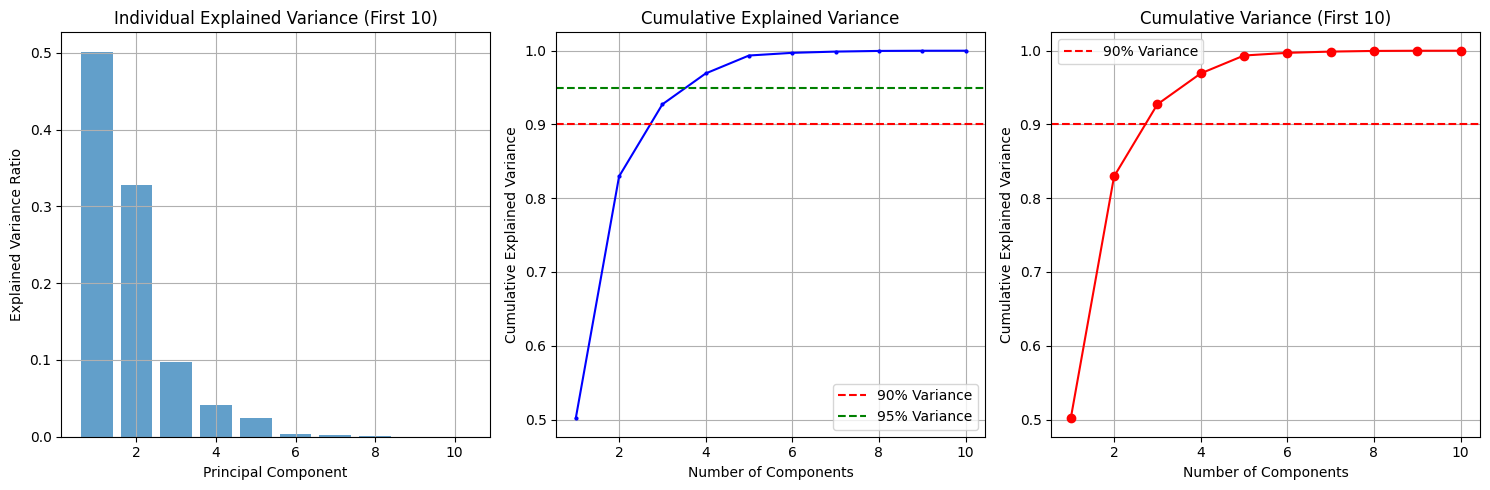

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, 11), pca_full.explained_variance_ratio_[:10], alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance (First 10)')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-', markersize=2)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(range(1, 11), cumsum_var[:10], 'ro-')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance (First 10)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

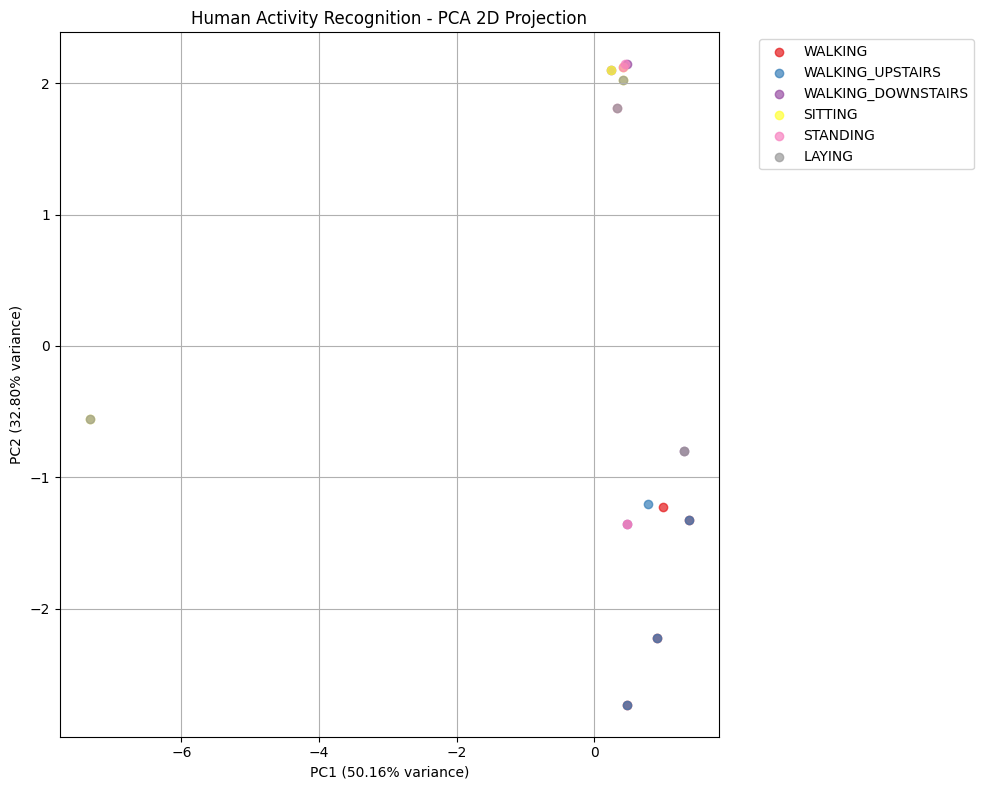

In [8]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
activities = df['activity'].unique()
colors = plt.cm.Set1(np.linspace(0, 1, len(activities)))

for i, activity in enumerate(activities):
    mask = y == activity
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
               c=[colors[i]], label=activity, alpha=0.7)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Human Activity Recognition - PCA 2D Projection')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

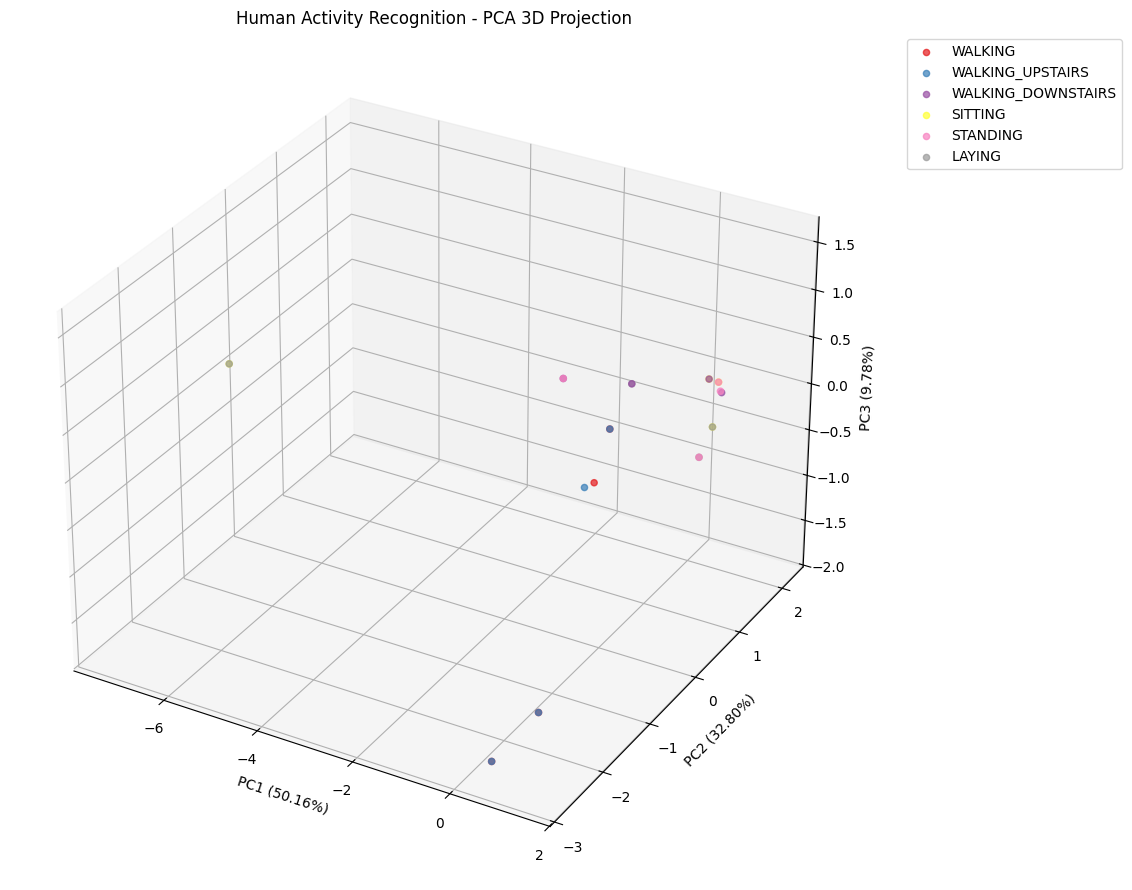

In [9]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for i, activity in enumerate(activities):
    mask = y == activity
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
              c=[colors[i]], label=activity, alpha=0.7)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax.set_title('Human Activity Recognition - PCA 3D Projection')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()